## What is SHAP Values?


SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model. It uses a game theoretic approach that measures each player's contribution to the final outcome. In machine learning, each feature is assigned an importance value representing its contribution to the model's output.

SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features.



## SHAP Values in Machine Learning


SHAP values are based on game theory and assign an importance value to each feature in a model. Features with positive SHAP values positively impact the prediction, while those with negative values have a negative impact. The magnitude is a measure of how strong the effect is.

## The Properties of SHAP Values

### Additivity
SHAP values are additive, which means that the contribution of each feature to the final prediction can be computed independently and then summed up. This property allows for efficient computation of SHAP values, even for high-dimensional datasets.

### Local accuracy
SHAP values add up to the difference between the expected model output and the actual output for a given input. This means that SHAP values provide an accurate and local interpretation of the model's prediction for a given input.

### Missingness
SHAP values are zero for missing or irrelevant features for a prediction. This makes SHAP values robust to missing data and ensures that irrelevant features do not distort the interpretation.

### Consistency
SHAP values do not change when the model changes unless the contribution of a feature changes. This means that SHAP values provide a consistent interpretation of the model's behavior, even when the model architecture or parameters change.


## How to Implement SHAP Values in Python

In [17]:
import shap
import pandas as pd
import numpy as np
shap.initjs();

In [18]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df['Geography'] = df['Geography'].map({'France': 1, 'Germany': 2, 'Spain': 3})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [20]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [21]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,3,0,43,2,125510.82,1,1,1,79084.10,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report


In [38]:
X_train, X_test, y_train, y_test =train_test_split(df.drop('Exited',axis=1),df['Exited'],test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2634
           1       0.45      0.73      0.56       366

    accuracy                           0.86      3000
   macro avg       0.70      0.81      0.74      3000
weighted avg       0.90      0.86      0.87      3000



We will first create an explainer object by providing a random forest classification model, then calculate SHAP value using a testing set.

In [39]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

#### Summary Plot
Display the summary_plot using SHAP values and testing set.


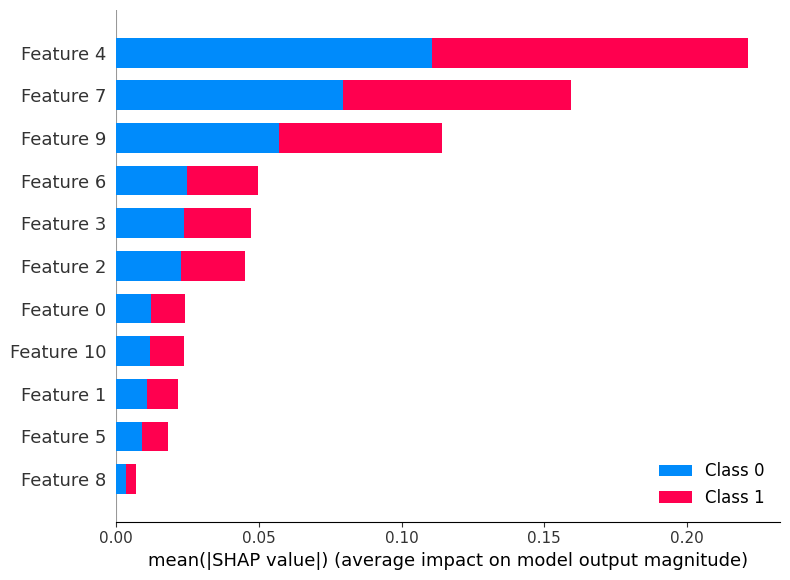

In [40]:
shap.summary_plot(shap_values, X_test)

Y-axis indicates the feature names in order of importance from top to bottom.
X-axis represents the SHAP value, which indicates the degree of change in log odds

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


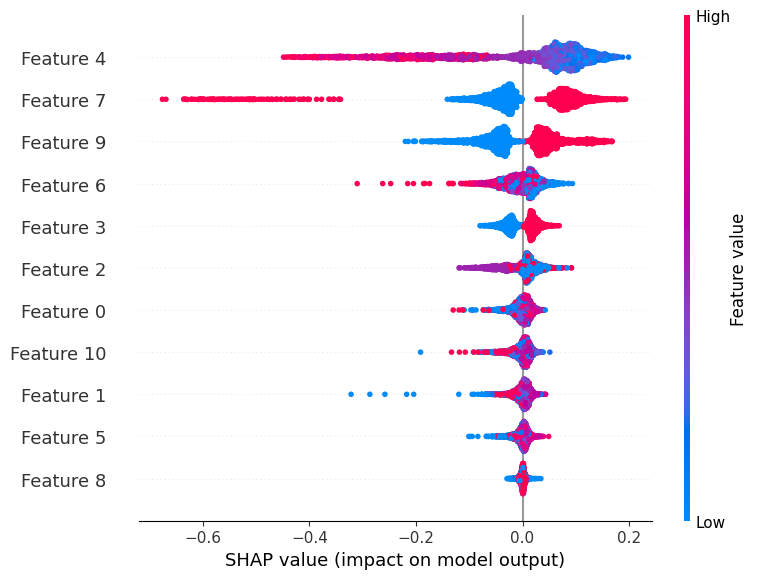

In [41]:
shap.summary_plot(shap_values[0], X_test)

Explore More Here - Click Here(!https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability)